
CUSTOMER SEGMENTATION FOR INVESTMENT BANKING COMPANIES
===

PROJECT OBJECTIVE:
The objective of this project is to segment investment banking clients based on 
demographic and behavioral investment factors. This segmentation aids in 
targeted marketing, personalized financial offerings, and strategic business 
decision-making.

DATASET:
An artificially generated dataset simulating real-world client profiles, with fields:
- client_id
- occupation
- income_level
- investment_tenure
- recency
- monetary
- frequency (annual)
- total_investment_value
- age

ALGORITHM USED:
K-Means Clustering Algorithm is used to group clients into distinct clusters 
based on their financial behaviors. The Elbow Method is applied to identify the 
optimal number of clusters.

TECHNIQUES & TOOLS:
- Data Preprocessing & Standardization (StandardScaler)
- K-Means Clustering (Unsupervised ML)
- Elbow Method for selecting optimal 'k'
- RFM (Recency, Frequency, Monetary) Analysis
- Data Visualization using Seaborn & Plotly (2D & Interactive 3D)

OUTCOME:
The analysis provides insight into customer segments such as:
- High-value long-term investors
- Young short-term investors
- Mid-income frequent investors

These segments help investment banks drive:
- Targeted engagement strategies
- Portfolio-based product recommendations
- Enhanced customer satisfaction and retention


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.io as pio
pio.renderers.default = 'browser'

In [16]:
# ROUND OFF FLOAT TO INTEGER
data = pd.read_csv('Final_dataset.csv')
data['age'] = data['age'].round(0).astype(int)
data.to_csv('finall_datasett _rounded8.csv', index=False)
print("Rounded off float values in the specified column successfully.")


Rounded off float values in the specified column successfully.


In [20]:
data.describe()

,client_id,Income_level,investment_tenure,Recency,monetary,Frequency(annual),total_investment_value,age
count,1229.000000,1.229000e+03,1229.000000,1229.000000,1229.000000,1229.000000,1.229000e+03,1229.000000
mean,615.000000,6.836387e+06,5.080553,3.100895,3.346623,3.049634,1.215554e+07,39.418226
std,354.926049,4.004271e+06,2.442336,1.347422,1.497647,1.341511,8.114194e+06,14.308235
min,1.000000,5.000000e+00,1.000000,1.000000,1.000000,1.000000,5.035150e+05,18.000000
25%,308.000000,3.558650e+06,3.000000,2.000000,2.000000,2.000000,5.208171e+06,27.000000
50%,615.000000,6.154064e+06,5.000000,3.000000,3.000000,3.000000,1.057993e+07,37.000000
75%,922.000000,9.802164e+06,7.000000,4.000000,5.000000,4.000000,1.848732e+07,49.000000
max,1229.000000,1.535173e+07,10.000000,5.000000,6.000000,5.000000,2.961695e+07,71.000000


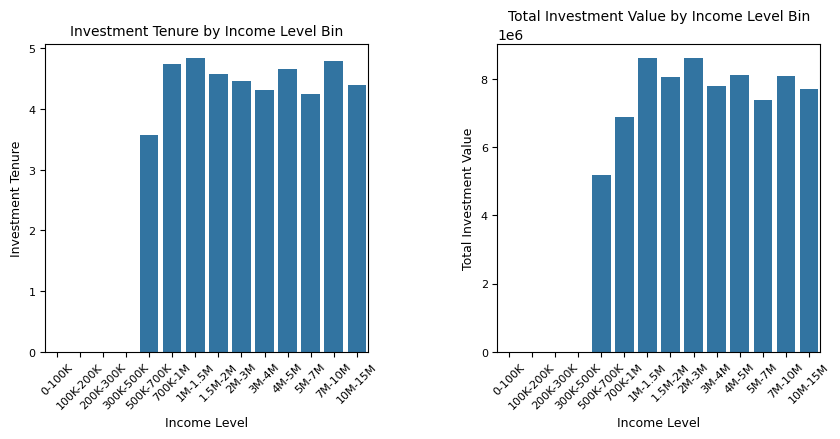

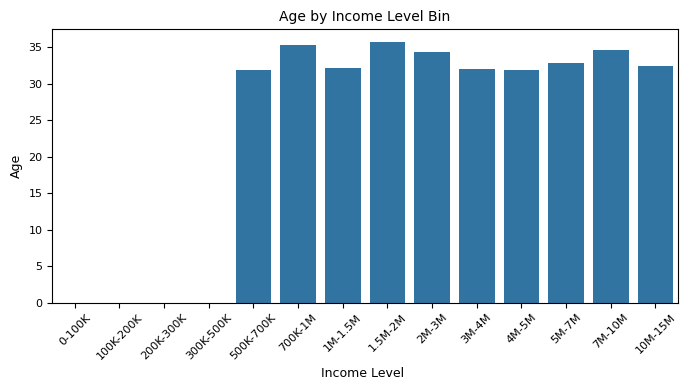

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Final_short_dataset.csv'
df = pd.read_csv(file_path)

# income and investment bins define
income_bins = [0, 100000, 200000, 300000, 500000, 700000, 1000000, 1500000, 2000000,
               3000000, 4000000, 5000000, 7000000, 10000000, 15000000]
income_labels = ['0-100K', '100K-200K', '200K-300K', '300K-500K', '500K-700K', '700K-1M',
                 '1M-1.5M', '1.5M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-7M', '7M-10M', '10M-15M']
df['Income_bin'] = pd.cut(df['Income_level'], bins=income_bins, labels=income_labels)

investment_labels = income_labels
df['Investment_bin'] = pd.cut(df['total_investment_value'], bins=income_bins, labels=investment_labels)

#investment tenure & total investment value
plt.figure(figsize=(10, 4))

for n, x in enumerate(['investment_tenure', 'total_investment_value'], 1):
    plt.subplot(1, 2, n)
    plt.subplots_adjust(wspace=0.4)
    sns.barplot(data=df, x='Income_bin', y=x, errorbar=None)
    plt.title(f'{x.replace("_", " ").title()} by Income Level Bin', fontsize=10)
    plt.xlabel('Income Level', fontsize=9)
    plt.ylabel(x.replace('_', ' ').title(), fontsize=9)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)

#age plot
plt.figure(figsize=(7, 4))  # reduced from (9, 6)
sns.barplot(data=df, x='Income_bin', y='age', errorbar=None)
plt.title('Age by Income Level Bin', fontsize=10)
plt.xlabel('Income Level ', fontsize=9)
plt.ylabel('Age', fontsize=9)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

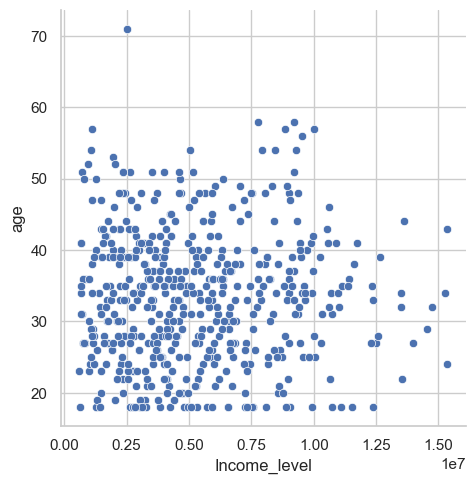

In [10]:
# Age by Income Scatter Plot
sns.relplot(x="Income_level", y="age", data=df)

/Users/sakshamsahu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/sakshamsahu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/sakshamsahu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul

/Users/sakshamsahu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/sakshamsahu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/sakshamsahu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul

/Users/sakshamsahu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero e

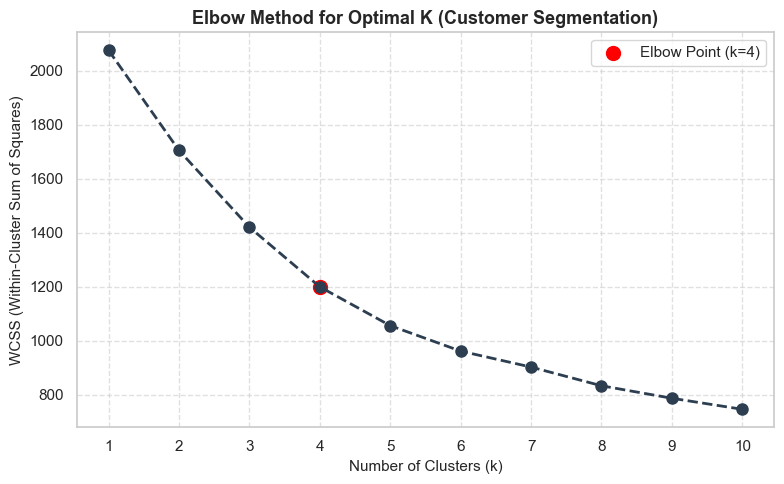

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path = 'Final_short_dataset.csv' 
df = pd.read_csv(file_path)

features = ['Income_level', 'total_investment_value', 'investment_tenure', 'age']
X = df[features]


# Removing extreme outliers (Z-score method)
from scipy.stats import zscore
z_scores = np.abs(zscore(X))
X = X[(z_scores < 3).all(axis=1)]

# Scale the cleaned data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='#2c3e50', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal K (Customer Segmentation)', fontsize=13, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=11)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=11)
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.6)

# Visually k=4
elbow_k = 4
plt.scatter(elbow_k, wcss[elbow_k - 1], s=100, c='red', marker='o', label=f'Elbow Point (k={elbow_k})')
plt.legend()

plt.tight_layout()
plt.show()

/Users/sakshamsahu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/sakshamsahu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/sakshamsahu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul



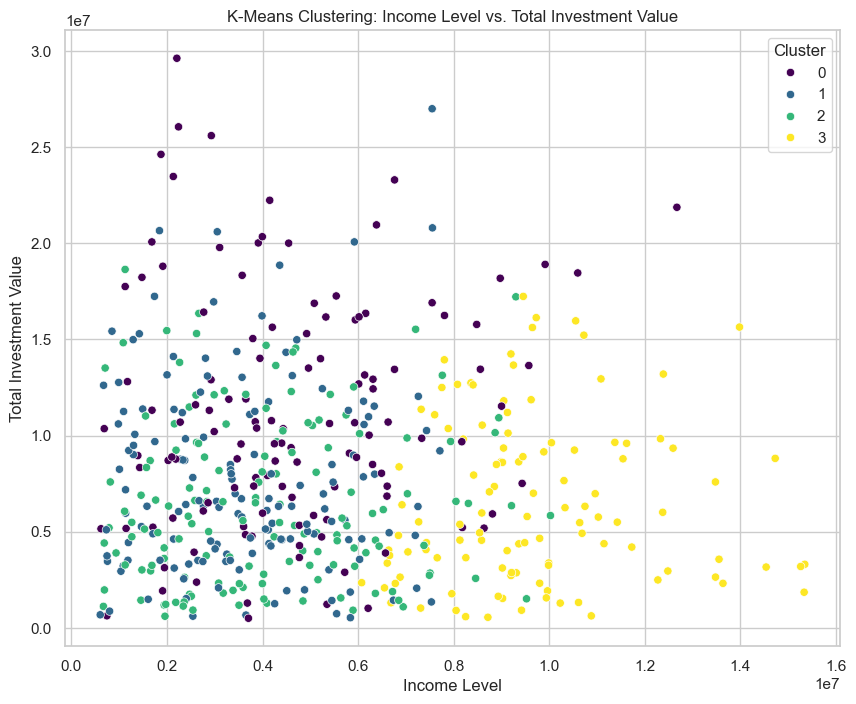

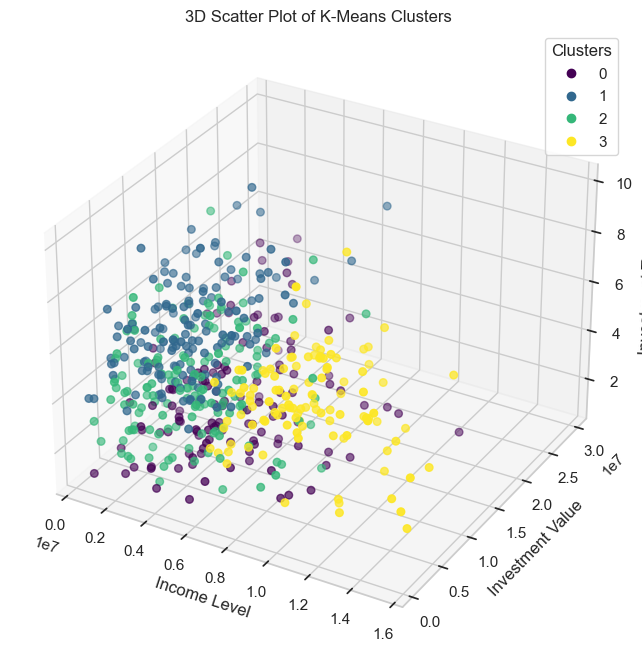

Interactive 3D scatter plot displayed in the browser.


In [47]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

df = pd.read_csv('Final_short_dataset.csv')

features = ['Income_level', 'total_investment_value', 'investment_tenure', 'age']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


# 2D Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Income_level', y='total_investment_value', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering: Income Level vs. Total Investment Value')
plt.xlabel('Income Level')
plt.ylabel('Total Investment Value')
plt.legend(title='Cluster')
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Income_level'], df['total_investment_value'], df['investment_tenure'], c=df['Cluster'], cmap='viridis', s=30)
ax.set_title('3D Scatter Plot of K-Means Clusters')
ax.set_xlabel('Income Level')
ax.set_ylabel('Investment Value')
ax.set_zlabel('Investment Tenure')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# 3D Scatter Plot Interactive On Browser
fig = px.scatter_3d(
    df, 
    x='Income_level', 
    y='total_investment_value', 
    z='investment_tenure', 
    color='Cluster', 
    title='3D Scatter Plot of K-Means Clusters',
    labels={
        'Income_level': 'Income Level', 
        'total_investment_value': 'Investment Value', 
        'investment_tenure': 'Investment Tenure'
    },
    color_discrete_sequence=['red', 'blue', 'green']
)
fig.update_traces(marker=dict(size=2)) 
fig.show()
print("Interactive 3D scatter plot displayed in the browser.")


RFM ANALYSIS
===

/var/folders/wv/1v9qq86s0qsfk_jscb77rdvh0000gn/T/ipykernel_4834/3778917063.py:91: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




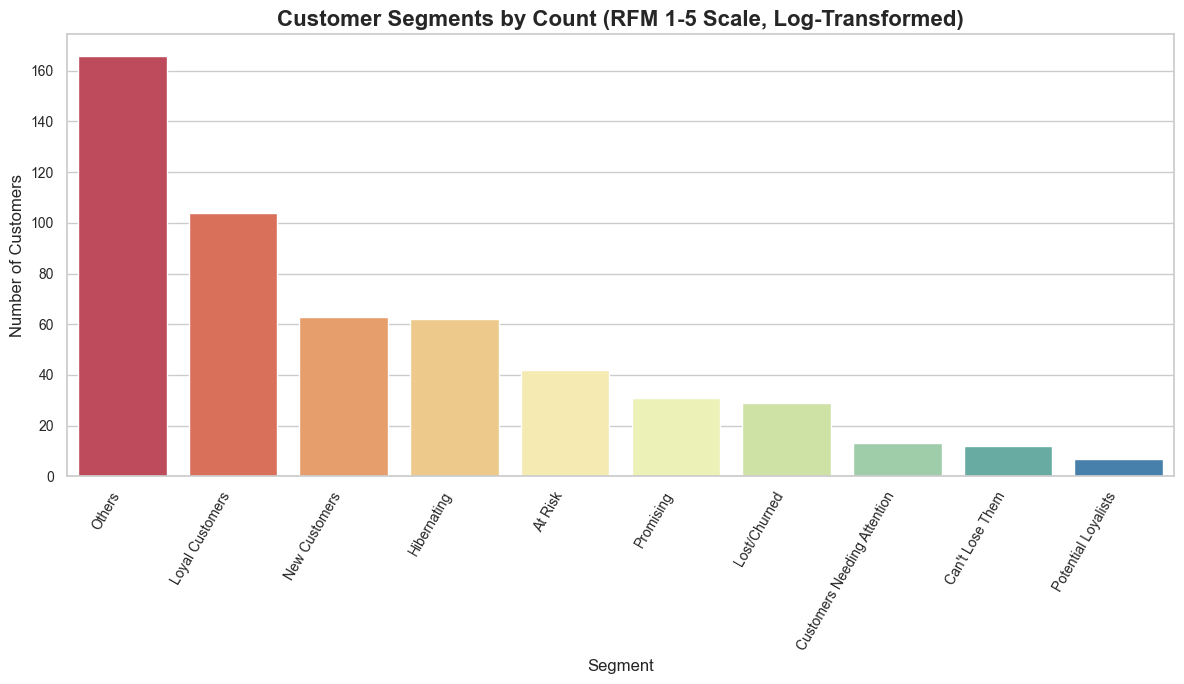

Full results per customer saved to 'RFM_Analysis_Results.csv'.
Segment summary saved to 'RFM_Segment_Summary.csv'.
| Segment                     | Recency   | Frequency   | Monetary   | total_investment_value   | Income_level   | age   | Customer Count   |
|:----------------------------|:----------|:------------|:-----------|:-------------------------|:---------------|:------|:-----------------|
| Others                      | 3.21      | 3.41        | 3.13       | 8081991.11               | 5171001.51     | 34.30 | 166.00           |
| Loyal Customers             | 1.47      | 3.90        | 3.45       | 8145674.88               | 5404648.02     | 32.43 | 104.00           |
| New Customers               | 1.65      | 1.41        | 2.00       | 8419084.97               | 5477196.87     | 32.16 | 63.00            |
| Hibernating                 | 3.53      | 1.56        | 2.05       | 7643318.06               | 4437206.84     | 34.47 | 62.00            |
| At Risk                     | 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Final_short_dataset.csv'
df = pd.read_csv(file_path)

# Rename columns for consistency
df.rename(columns={
    'client_id': 'CustomerID',
    'Recency': 'Recency',
    'Frequency(annual)': 'Frequency',
    'monetary': 'Monetary'
}, inplace=True)

# Ensure numeric types and handle potential missing values
df['Recency'] = pd.to_numeric(df['Recency'], errors='coerce')
df['Frequency'] = pd.to_numeric(df['Frequency'], errors='coerce')
df['Monetary'] = pd.to_numeric(df['Monetary'], errors='coerce')
df.dropna(subset=['Recency', 'Frequency', 'Monetary'], inplace=True)

# Apply Log Transformation to RFM variables
df['Recency_log'] = np.log1p(df['Recency'])
df['Frequency_log'] = np.log1p(df['Frequency'])
df['Monetary_log'] = np.log1p(df['Monetary'])

# RMF Scale -> 5 is best, 1 is worst
# Recency: 5 is best (most recent), 1 is worst
df['R_Score'] = pd.qcut(df['Recency_log'], q=5, duplicates='drop', labels=False)
df['R_Score'] = 5 - df['R_Score']

# Frequency
df['F_Score'] = pd.qcut(df['Frequency_log'], q=5, duplicates='drop', labels=False) + 1

# Monetary
df['M_Score'] = pd.qcut(df['Monetary_log'], q=5, duplicates='drop', labels=False) + 1

# Combine RFM scores
df['RFM_Score'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)

# Define customer segmentation strategy for 1-5 scale
def assign_segment_5_scale(df_row):
    r = int(df_row['R_Score'])
    f = int(df_row['F_Score'])
    m = int(df_row['M_Score'])

    if r == 5 and f == 5 and m == 5:
        return 'Champions'
    elif r == 5 and (f >= 4 or m >= 4):
        return 'Loyal Customers'
    elif r == 5 and (f <= 2 and m <= 2):
        return 'New Customers'
    elif (r >= 4) and (f <= 2) and (m >= 4):
        return 'Potential Loyalists'
    elif (r >= 3 and r <= 4) and (f >= 3 and f <= 4) and (m >= 3 and m <= 4):
        return 'Promising'
    elif (r <= 2) and (f >= 4) and (m >= 4):
        return 'Customers Needing Attention'
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Lost/Churned'
    elif (r <= 2) and (f >= 3) and (m <= 2):
        return 'At Risk'
    elif (r <= 2) and (f <= 2) and (m >= 3):
        return 'Can\'t Lose Them'
    elif (r >= 3 and r <= 4) and (f <= 2) and (m <= 2):
        return 'Hibernating'
    else:
        # Average Customers
        return 'Others'

df['Segment'] = df.apply(assign_segment_5_scale, axis=1)

# Summarize segments
segment_summary = df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'total_investment_value': 'mean',
    'Income_level': 'mean',
    'age': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Customer Count'})

# Sort segments by Customer Count
segment_summary = segment_summary.sort_values(by='Customer Count', ascending=False)

# Visualize segments
plt.figure(figsize=(12, 7))
sns.barplot(
    data=segment_summary.reset_index(),
    x='Segment',
    y='Customer Count',
    palette='Spectral'
)
plt.title('Customer Segments by Count)', fontsize=16, fontweight='bold')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Save results
df.to_csv('RFM_Analysis_Results.csv', index=False)
segment_summary.to_csv('RFM_Segment_Summary.csv')

print("Full results per customer saved to 'RFM_Analysis_Results.csv'.")
print("Segment summary saved to 'RFM_Segment_Summary.csv'.")

print(segment_summary.to_markdown(numalign="left", stralign="left", floatfmt=".2f"))

Champions: These are your absolute best customers! They've done business with you recently, they do it often, and they spend the most money. Treat them like gold!

Loyal Customers: These are also great customers. They've been with you recently, and they either do business with you often or spend a lot of money. They're very reliable.

New Customers: These folks just started doing business with you. They're recent, but haven't bought much or very often yet. You want to help them stick around!

Potential Loyalists: They've done business recently and spent a good amount, but they don't do it very often. They could become loyal if you give them a reason.

Promising: These customers are just "average" across the board. They're not super recent, frequent, or high-spending, but they're consistent and have room to grow.

Customers Needing Attention: These were once very good customers (bought often and spent a lot), but they haven't done business with you recently. You need to reach out quickly before you lose them completely.

Lost/Churned: These customers haven't done business recently, don't do it often, and don't spend much. They've likely moved on.

At Risk: They haven't been recent customers, but they used to do business often. They're starting to slip away.

Can't Lose Them: These are super important customers! They haven't been recent or frequent, but when they did buy, they spent a lot. You absolutely must try to get them back.

Hibernating: These customers aren't very recent, frequent, or high-spending. They're just "sleeping" for now and might come back if gently nudged.

Others: This group is a mix of customers whose behavior doesn't clearly fit into any of the other main categories. They're diverse and might need a closer look to understand them better.